In [1]:
!pip install dill
!pip install multiprocess
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dill
from os.path import exists
from collections import defaultdict
%matplotlib inline
import math
from multiprocess import Pool

import scipy
from scipy.stats import zscore
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
def get_dist_filename(dist_win, percent, offset):
    offset_str = ''
    if offset != 0: offset_str = str(offset) + '+'
    return 'dist_win_sel_' + str(dist_win) + '_' + offset_str + str(percent) + '.dat'

def get_time_filename(time_win, percent, offset):
    offset_str = ''
    if offset != 0: offset_str = str(offset) + '+'
    return 'time_win_sel_' + str(time_win) + '_' + offset_str  + str(percent) + '.dat'

def get_col_name(dist_win, time_win):
    return 'type_dist_' + str(dist_win) + '_time_' + str(time_win)

In [5]:
dist_params = [800, 400, 200, 100, 50]
time_params = [60, 30, 20, 10]
percent = 0.1 # Change this from 0.05 (50k) to 0.1 (100k)
force = True
row_count = int(100000 * percent) * 10
x_cols = ['Latitude','Longitude','dow','hour','minute','second']

windows = [(0,0)]
for dist_win in dist_params:
    for time_win in time_params:
        windows.append((dist_win, time_win))

processed_df = dill.load(open('processed_df_' + str(row_count) + '.dat', 'rb'))
#processed_df = pd.read_csv('processed_df_' + str(row_count) + '.dat')
print(processed_df.shape)
X = processed_df[[*x_cols]]
x_train = None
x_test = None
Ys_train = dict()
Ys_test = dict()
for dist_win in dist_params:
    for time_win in time_params:
        col_name = get_col_name(dist_win, time_win)
        print('dist: ' + str(dist_win) + ' | time: ' + str(time_win) + ' | col_name: ' + get_col_name(dist_win, time_win))
        assert(col_name in processed_df.columns)
        Y = processed_df[col_name]
        x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=2022, train_size=0.8)
        Ys_train[(dist_win, time_win)] = y_train
        Ys_test[(dist_win, time_win)] = y_test
processed_df
        

(100000, 27)
dist: 800 | time: 60 | col_name: type_dist_800_time_60
dist: 800 | time: 30 | col_name: type_dist_800_time_30
dist: 800 | time: 20 | col_name: type_dist_800_time_20
dist: 800 | time: 10 | col_name: type_dist_800_time_10
dist: 400 | time: 60 | col_name: type_dist_400_time_60
dist: 400 | time: 30 | col_name: type_dist_400_time_30
dist: 400 | time: 20 | col_name: type_dist_400_time_20
dist: 400 | time: 10 | col_name: type_dist_400_time_10
dist: 200 | time: 60 | col_name: type_dist_200_time_60
dist: 200 | time: 30 | col_name: type_dist_200_time_30
dist: 200 | time: 20 | col_name: type_dist_200_time_20
dist: 200 | time: 10 | col_name: type_dist_200_time_10
dist: 100 | time: 60 | col_name: type_dist_100_time_60
dist: 100 | time: 30 | col_name: type_dist_100_time_30
dist: 100 | time: 20 | col_name: type_dist_100_time_20
dist: 100 | time: 10 | col_name: type_dist_100_time_10
dist: 50 | time: 60 | col_name: type_dist_50_time_60
dist: 50 | time: 30 | col_name: type_dist_50_time_30
d

,TYP_DESC,Latitude,Longitude,dow,hour,minute,second,type_dist_800_time_60,type_dist_800_time_30,type_dist_800_time_20,...,type_dist_200_time_20,type_dist_200_time_10,type_dist_100_time_60,type_dist_100_time_30,type_dist_100_time_20,type_dist_100_time_10,type_dist_50_time_60,type_dist_50_time_30,type_dist_50_time_20,type_dist_50_time_10
0,VISIBILITY PATROL: DIRECTED,40.677802,-73.871348,0,3,29,46,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,...,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED
1,VISIBILITY PATROL: DIRECTED,40.672100,-73.871114,0,15,56,56,ALL OUT DIRECTED,ALL OUT DIRECTED,ALL OUT DIRECTED,...,ALL OUT DIRECTED,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,ALL OUT DIRECTED,ALL OUT DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED,ALL OUT DIRECTED,ALL OUT DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED
2,VISIBILITY PATROL: DIRECTED,40.672943,-73.870835,0,4,32,35,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,...,SEE COMPLAINANT: OTHER/INSIDE,SEE COMPLAINANT: OTHER/INSIDE,SEE COMPLAINANT: OTHER/INSIDE,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED
3,VISIBILITY PATROL: DIRECTED,40.672943,-73.870835,0,15,55,38,TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP,TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP,TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP,...,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED
4,VISIBILITY PATROL: DIRECTED,40.669050,-73.870359,0,0,24,36,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,SEE COMPLAINANT: OTHER/INSIDE,...,ALL OUT DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,ALL OUT DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,ALL OUT DIRECTED,ALL OUT DIRECTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,40.674136,-73.922093,1,9,19,39,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,...,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT
99996,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,40.667179,-73.918860,1,16,10,12,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,SEE COMPLAINANT: OTHER/INSIDE,...,DISPUTE: INSIDE,SEE COMPLAINANT: OTHER/INSIDE,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT
99997,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,40.680745,-73.916760,1,2,18,40,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,...,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME V

In [9]:
# Baseline, zero window size
Y = processed_df['TYP_DESC']
x_train_base, x_test_base, y_train_base, y_test_base = train_test_split(X, Y, random_state=2022, train_size=0.8)

In [9]:
from sklearn.linear_model import LogisticRegression
lg_accuracy = dict()
lg_models = dict()

def logReg(window, x_train, x_test, y_train, y_test):
    clf = LogisticRegression(random_state=0).fit(x_train,y_train)
    lg_accuracy[window] = clf.score(x_test,y_test)
    lg_models[window] = clf
    print(str(window) + ' acc: ' + str(lg_accuracy[window]))

In [17]:

logReg((0, 0), x_train_base, x_test_base, y_train_base, y_test_base)

# To access training and testing data for windows, use:
# x_train
# x_test
# Ys_train[(dist_win, time_win)]
# Ys_test[(dist_win, time_win)]

for dist_win in dist_params:
    for time_win in time_params:
        window = (dist_win, time_win)
        x_train
        x_test
        y_train = Ys_train[window]
        y_test = Ys_test[window]
        # Train window models
        logReg(window,x_train, x_test, y_train, y_test)
print(lg_accuracy)
dill.dump(lg_accuracy, open('lg_accuracy.dat', 'wb'))
       
  

(0, 0) acc: 0.2632
(800, 60) acc: 0.5729
(800, 30) acc: 0.50865
(800, 20) acc: 0.4675
(800, 10) acc: 0.38715
(400, 60) acc: 0.41405
(400, 30) acc: 0.3545
(400, 20) acc: 0.32215
(400, 10) acc: 0.27455
(200, 60) acc: 0.30855
(200, 30) acc: 0.2786
(200, 20) acc: 0.2662
(200, 10) acc: 0.25045
(100, 60) acc: 0.27815
(100, 30) acc: 0.26685
(100, 20) acc: 0.25975
(100, 10) acc: 0.24845
(50, 60) acc: 0.27905
(50, 30) acc: 0.26675
(50, 20) acc: 0.2598
(50, 10) acc: 0.2499
{(0, 0): 0.2632, (800, 60): 0.5729, (800, 30): 0.50865, (800, 20): 0.4675, (800, 10): 0.38715, (400, 60): 0.41405, (400, 30): 0.3545, (400, 20): 0.32215, (400, 10): 0.27455, (200, 60): 0.30855, (200, 30): 0.2786, (200, 20): 0.2662, (200, 10): 0.25045, (100, 60): 0.27815, (100, 30): 0.26685, (100, 20): 0.25975, (100, 10): 0.24845, (50, 60): 0.27905, (50, 30): 0.26675, (50, 20): 0.2598, (50, 10): 0.2499}


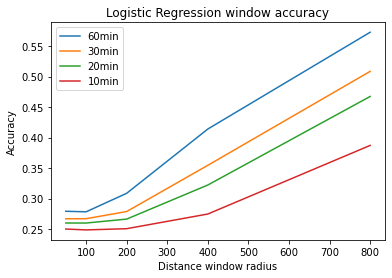

In [18]:
lg_accuracy = dill.load(open('lg_accuracy.dat', 'rb'))
for time_win in time_params:
    plt.plot(dist_params, [lg_accuracy[(dist_win, time_win)] for dist_win in dist_params], label = str(time_win)+'min')
plt.xlabel('Distance window radius')
plt.ylabel('Accuracy')
plt.title('Logistic Regression window accuracy')
plt.legend()
plt.show()

In [6]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_best_params = dict()
def rf_search(window, x_train, x_test, y_train, y_test):
    # Create the grid
    rf_grid = {'n_estimators': [50, 100, 200],
               'max_depth': [5, 10, 20],
               'max_features': ['auto'],
               'criterion': ['gini']}
    # Create the model to be tuned
    rf_base = RandomForestClassifier()
    # Create the random search Random Forest
    rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = rf_grid, 
                               n_iter = 5, 
                               cv = 2,
                            #    n_splits = 2,
                               verbose = 1, 
                               random_state = 611,
                               n_jobs = -1)
    # Fit the random search model
    rf_random.fit(x_train, y_train)
    # View the best parameters from the random search
    rf_best_params[window] = rf_random.best_params_
    print(rf_random.best_params_)

In [7]:
import dill

for dist_win in dist_params:
    for time_win in time_params:
        window = (dist_win, time_win)
        x_train
        x_test
        y_train = Ys_train[window]
        y_test = Ys_test[window]
        # Train window models
        rf_search(window,x_train, x_test, y_train, y_test)
rf_search((0, 0), x_train_base, x_test_base, y_train_base, y_test_base)

dill.dump(rf_best_params, open('rf_best_params.dat', 'wb'))

Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}
Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}
Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}
Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}
Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}
Fi

In [6]:
# rf_search((0, 0), x_train_base, x_test_base, y_train_base, y_test_base)
rf_best_params = dill.load(open('rf_best_params.dat', 'rb'))
print(rf_best_params)

{(800, 60): {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}, (800, 30): {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}, (800, 20): {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}, (800, 10): {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}, (400, 60): {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}, (400, 30): {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}, (400, 20): {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}, (400, 10): {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}, (200, 60): {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}, (200, 30): {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}, (200, 20): {'n_estimators': 100, 'max_features': 

In [7]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
rf_accuracy = dict()
rf_models = dict()
def rf(window, x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier(**rf_best_params[window])
    # Fit the random search model
    rf.fit(x_train, y_train)
    rf_accuracy[window] = rf.score(x_test,y_test)
    rf_models[window] = rf
    print(str(window) + ' acc: ' + str(rf_accuracy[window]))
    # View the best parameters from the random search


In [10]:
rf((0, 0), x_train_base, x_test_base, y_train_base, y_test_base)
for dist_win in dist_params:
    for time_win in time_params:
        window = (dist_win, time_win)
        x_train
        x_test
        y_train = Ys_train[window]
        y_test = Ys_test[window]
        # Train window models
        rf(window,x_train, x_test, y_train, y_test)
dill.dump(rf_accuracy, open('rf_accuracy.dat', 'wb'))

(0, 0) acc: 0.3914
(800, 60) acc: 0.5729
(800, 30) acc: 0.5085
(800, 20) acc: 0.4675
(800, 10) acc: 0.38715
(400, 60) acc: 0.41405
(400, 30) acc: 0.35455
(400, 20) acc: 0.32215
(400, 10) acc: 0.27465
(200, 60) acc: 0.30975
(200, 30) acc: 0.27925
(200, 20) acc: 0.2679
(200, 10) acc: 0.2535
(100, 60) acc: 0.28165
(100, 30) acc: 0.27045
(100, 20) acc: 0.26475
(100, 10) acc: 0.2758
(50, 60) acc: 0.28175
(50, 30) acc: 0.28155
(50, 20) acc: 0.28315
(50, 10) acc: 0.28745


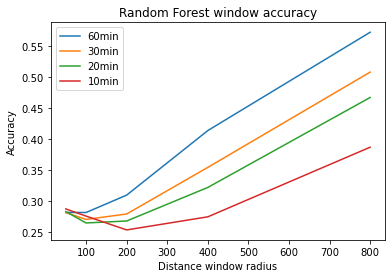

In [11]:
for time_win in time_params:
    plt.plot(dist_params, [rf_accuracy[(dist_win, time_win)] for dist_win in dist_params], label = str(time_win)+'min')
plt.xlabel('Distance window radius')
plt.ylabel('Accuracy')
plt.title('Random Forest window accuracy')
plt.legend()
plt.show()

In [15]:
def objfun(acc, window, c):
    return acc - c * ((window[0]) ** 2 + (10 * window[1]) ** 2)

In [21]:
acc_results = pd.DataFrame(columns=['Window'])
acc_results['Window'] = windows
acc = []
for win in windows:
    acc.append(round(lg_accuracy[win], 2))
acc_results['Accuracy'] = acc
acc = []
base_acc = lg_accuracy[(0,0)]
for win in windows:
    win_acc = lg_accuracy[win]
    acc.append(round((win_acc - base_acc) / base_acc * 100, 2))
acc_results['Percent improvement'] = acc
gain = []
for win in windows:
    gain.append(round(objfun(lg_accuracy[win], win, 0.00000033), 2))
acc_results['Objective gain'] = gain
acc_results.to_csv('log_res.csv')
acc_results
# acc_results.plot.bar(x='Window', y='Objective gain')


In [12]:
# def objfun(acc, window, c):
#     return acc - c * ((window[0]) ** 2 + (10 * window[1]) ** 2)
def objfun(acc, window, c):
    return acc - c * ((window[0] * 0.9) ** 2.22 + (8 * window[1]) ** 2)

In [13]:
acc_results = pd.DataFrame(columns=['Window'])
acc_results['Window'] = windows
acc = []
for win in windows:
    acc.append(round(rf_accuracy[win], 2))
acc_results['Accuracy'] = acc
acc = []
base_acc = rf_accuracy[(0,0)]
for win in windows:
    win_acc = rf_accuracy[win]
    acc.append(round((win_acc - base_acc) / base_acc * 100, 2))
acc_results['Percent improvement'] = acc
gain = []
for win in windows:
    gain.append(round(objfun(rf_accuracy[win], win, 0.0000001), 2))
acc_results['Objective gain'] = gain
# print(tabulate(acc_results.T, headers='firstrow', tablefmt='fancy_grid'))
acc_results.to_csv('log_res.csv')
acc_results
# acc_results.loc[1:,:].plot.bar(x='Window', y='Objective gain')

,Window,Accuracy,Percent improvement,Objective gain
0,"(0, 0)",0.39,0.00,0.39
1,"(800, 60)",0.57,46.37,0.33
2,"(800, 30)",0.51,29.92,0.28
3,"(800, 20)",0.47,19.44,0.24
4,"(800, 10)",0.39,-1.09,0.17
5,"(400, 60)",0.41,5.79,0.34
6,"(400, 30)",0.35,-9.41,0.30
7,"(400, 20)",0.32,-17.69,0.27
8,"(400, 10)",0.27,-29.83,0.23
9,"(200, 60)",0.31,-20.86,0.28
